## Imports

In [2]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline
import scipy.optimize as opt
import pickle

In [3]:
plt.style.use("/Users/nolansmyth/Dropbox/kinetic_recoupling/figures/style.mplstyle")

## Parameters and Constants

In [4]:
z_pk = 0.0; #redshift at which Pk is determined
pk_max = 1.e2; #maximum k for Pk
kk = np.logspace(-4,np.log10(pk_max),500)
f_idm_dr = 1.0
omega0_cdm = 0.12038;


commonset = {
    'omega_b': 0.022032,
    'omega_cdm': omega0_cdm,
    'h': 0.67556,
    'A_s': 2.215e-9,
    'n_s': 0.9619,
    'tau_reio': 0.0925,
    'output': 'tCl,pCl,lCl,mPk',
    'lensing': 'yes',
    'P_k_max_1/Mpc': pk_max,
    'z_pk': 0.0,
    'k_output_values':'10',
}

idrset = {
    # Dark matter/radiation parameters
    'f_idm_dr': f_idm_dr, #Amount of dm that is interacting
    'xi_idr': 0.3, 
    'stat_f_idr': 0.875, #fermionic
    'nindex_idm_dr': 4.0, 
    'm_idm': 1.0e3,
    # Scattering rate parameters
    'a_idm_dr': 1.0e0,
    'rec_case': 4 #1 = power, 2 = Theta, 3 = delta function, 4 = no recoupling
}

## Functions

In [5]:
def getPk(classObj):
    kk = np.logspace(-4,np.log10(pk_max),500) # k in h/Mpc
    Pk = [] # P(k) in (Mpc/h)**3
    h = classObj.h() # get reduced Hubble for conversions to 1/Mpc
    for k in kk:
        Pk.append(classObj.pk(k*h,z_pk)*h**3) # function .pk(k,z)
    return Pk;

def getPkRatio(classObj1, classObj2):
    #Returns the ratio of the power spectrum of 1 to 2
    return[getPk(classObj1)[i]/getPk(classObj2)[i] for i in range(len(kk))]
    

def getdmu_idm_dr(classObj):
    return classObj.get_thermodynamics()['dmu_idm_dr']
    
def getzs(classObj):
    return classObj.get_thermodynamics()['z']

def getH(classObj):
    zs = np.flip(classObj.get_background()['z'])
    Hs = np.flip(classObj.get_background()['H [1/Mpc]'])
    return UnivariateSpline(zs, Hs, k=1.0, s=0.0)


def getDat(classObj):
    dmu_idm_dr = getdmu_idm_dr(classObj);
    zs = getzs(classObj);
    Hspline = getH(classObj);
    
    return dmu_idm_dr, zs, Hspline

## ΛCDM

In [6]:
LambdaCDM = Class()
LambdaCDM.set(commonset)
LambdaCDM.compute()
LambdaCDMPk = getPk(LambdaCDM);

## IDR

In [7]:
idrNoRec = Class()
idrNoRec.set(commonset)
idrNoRec.set(idrset)

idrNoRec.compute()

idrNoRecdmu_idm_dr, idrNoReczs, idrNoRecHspline = getDat(idrNoRec)

runs if  'a_idm_dr' is defined. gets used to define dmu_idr in perturbations.c

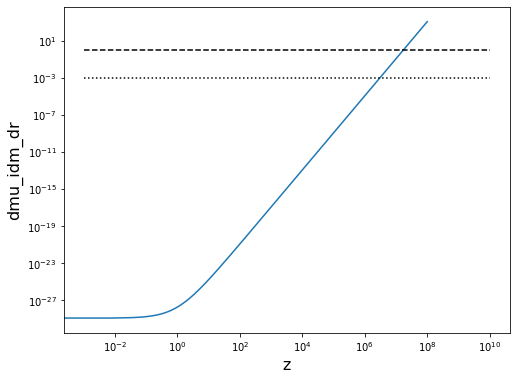

In [6]:
plt.figure(1,figsize=(8,6))

plt.plot(idrNoReczs,idrNoRecdmu_idm_dr,label='model')
    
plt.plot([1e-3,1e10], [1,1], 'k--')

plt.plot([1e-3,1e10], [1e-3,1e-3], 'k:')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=16)
plt.ylabel('dmu_idm_dr', fontsize=16)
plt.show()

/var/folders/qd/09mj47cx551c65glw6y47d6r0000gn/T/ipykernel_8368/1404227190.py:4: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


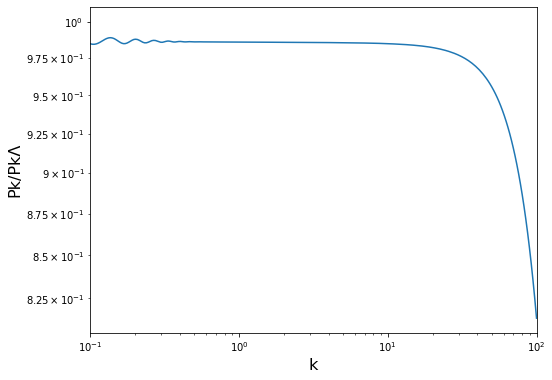

In [7]:
plt.figure(1,figsize=(8,6))
plt.plot(kk,getPkRatio(idrNoRec,LambdaCDM),label='model')
plt.xscale('log')
plt.yscale('Log')
plt.xlim(.1,pk_max)
# plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/PkΛ',fontsize=16)
plt.show()


## Delta Function Recoupling

In [8]:
idrDeltaset = {
    # Dark matter/radiation parameters
    'f_idm_dr': f_idm_dr, #Amount of dm that is interacting
#     'xi_idr': 0.01, 
    'xi_idr': 0.3, 
    'stat_f_idr': 0.875, #fermionic
    'nindex_idm_dr': 4.0, 
    'm_idm': 1.0e3,
    # Scattering rate parameters
    'a_idm_dr': 1.0e0,
#     'a_idm_dr': 1.0e-2,
    'rec_case': 3, #1 = power, 2 = Theta, 3 = delta function, 4 = no recoupling
#     'C_rec':0.88e-1,
    'A_rec':1e5,
    'T_rec':6.0e5,
}


In [9]:
idrDeltaMedset = {
    # Dark matter/radiation parameters
    'f_idm_dr': f_idm_dr, #Amount of dm that is interacting
#     'xi_idr': 0.01, 
    'xi_idr': 0.3, 
    'stat_f_idr': 0.875, #fermionic
    'nindex_idm_dr': 4.0, 
    'm_idm': 1.0e3,
    # Scattering rate parameters
    'a_idm_dr': 1.0e0,
#     'a_idm_dr': 1.0e-2,
    'rec_case': 3, #1 = power, 2 = Theta, 3 = delta function, 4 = no recoupling
#     'C_rec':0.88e-1,
    'A_rec':1e6,
    'T_rec':6.0e5,
}


In [10]:
idrDeltaStrongset = {
    # Dark matter/radiation parameters
    'f_idm_dr': f_idm_dr, #Amount of dm that is interacting
#     'xi_idr': 0.01, 
    'xi_idr': 0.3, 
    'stat_f_idr': 0.875, #fermionic
    'nindex_idm_dr': 4.0, 
    'm_idm': 1.0e3,
    # Scattering rate parameters
    'a_idm_dr': 1.0e0,
#     'a_idm_dr': 1.0e-2,
    'rec_case': 3, #1 = power, 2 = Theta, 3 = delta function, 4 = no recoupling
#     'C_rec':0.88e-1,
    'A_rec':1e7,
    'T_rec':6.0e5,
}


In [11]:
idrDelta = Class()
idrDelta.set(commonset)
idrDelta.set(idrDeltaset)

idrDelta.compute()

idrDeltadmu_idm_dr, idrDeltazs, idrDeltaHspline = getDat(idrDelta)

In [12]:
idrDeltaMed = Class()
idrDeltaMed.set(commonset)
idrDeltaMed.set(idrDeltaMedset)

idrDeltaMed.compute()

idrDeltaMeddmu_idm_dr, idrDeltaMedzs, idrDeltaMedHspline = getDat(idrDeltaMed)

In [13]:
idrDeltaStrong = Class()
idrDeltaStrong.set(commonset)
idrDeltaStrong.set(idrDeltaStrongset)

idrDeltaStrong.compute()

idrDeltaStrongdmu_idm_dr, idrDeltaStrongzs, idrDeltaStrongHspline = getDat(idrDeltaStrong)

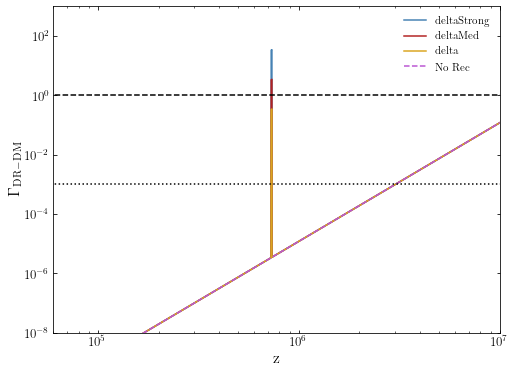

In [24]:
plt.figure(1,figsize=(8,6))


plt.plot(idrDeltaStrongzs,idrDeltaStrongdmu_idm_dr,label='deltaStrong')
plt.plot(idrDeltaMedzs,idrDeltaMeddmu_idm_dr,label='deltaMed')
plt.plot(idrDeltazs,idrDeltadmu_idm_dr,label='delta')
plt.plot(idrNoReczs,idrNoRecdmu_idm_dr,label='No Rec', linestyle='dashed')

plt.plot([1e-3,1e10], [1,1], 'k--')

plt.plot([1e-3,1e10], [1e-3,1e-3], 'k:')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=16)
plt.ylabel('$\Gamma_{\mathrm{DR-DM}}$', fontsize=16)

plt.xlim(6e4,1e7)
plt.ylim(1e-8,1e3)
plt.legend()

plt.show()

/var/folders/qd/09mj47cx551c65glw6y47d6r0000gn/T/ipykernel_8368/2121603431.py:4: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


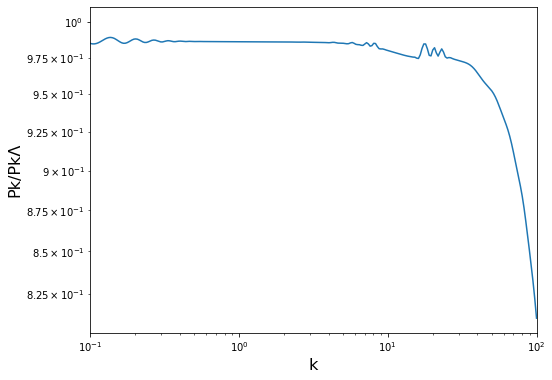

In [32]:
plt.figure(1,figsize=(8,6))
plt.plot(kk,getPkRatio(idrDelta,LambdaCDM),label='model')
plt.xscale('log')
plt.yscale('Log')
plt.xlim(.1,pk_max)
# plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/PkΛ',fontsize=16)
plt.show()


/var/folders/qd/09mj47cx551c65glw6y47d6r0000gn/T/ipykernel_8368/4095635278.py:6: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale('Log')


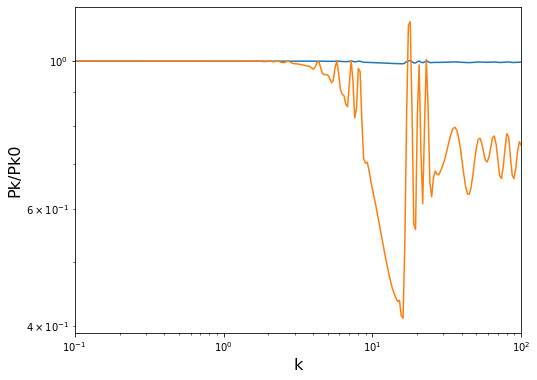

In [137]:
plt.figure(1,figsize=(8,6))
plt.plot(kk,getPkRatio(idrDelta,idrNoRec),label='Delta')
plt.plot(kk,getPkRatio(idrDeltaStrong,idrNoRec),label='DeltaStrong')

plt.xscale('log')
plt.yscale('Log')
plt.xlim(.1,pk_max)
# plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/Pk0',fontsize=16)
plt.legend()
plt.show()


In [17]:
spline_pars = {'k': 3, 's': 0.0}

delta_chi_no_rec = UnivariateSpline(idrNoRec.get_perturbations()['scalar'][0]['tau [Mpc]'], idrNoRec.get_perturbations()['scalar'][0]['delta_idm_dr'],**spline_pars)
delta_chi_dot_no_rec = delta_chi_no_rec.derivative()

delta_chi = UnivariateSpline(idrDelta.get_perturbations()['scalar'][0]['tau [Mpc]'], idrDelta.get_perturbations()['scalar'][0]['delta_idm_dr'], **spline_pars)
delta_chi_dot = delta_chi.derivative()

delta_chi_Med = UnivariateSpline(idrDeltaMed.get_perturbations()['scalar'][0]['tau [Mpc]'], idrDeltaMed.get_perturbations()['scalar'][0]['delta_idm_dr'], **spline_pars)
delta_chi_dot_Med = delta_chi_Med.derivative()

delta_chi_strong = UnivariateSpline(idrDeltaStrong.get_perturbations()['scalar'][0]['tau [Mpc]'], idrDeltaStrong.get_perturbations()['scalar'][0]['delta_idm_dr'], **spline_pars)
delta_chi_dot_strong = delta_chi_strong.derivative()

In [16]:
tau_span = (-2, 4)
taus = np.logspace(*tau_span, 1000)

In [151]:
idrDeltaStrong.get_perturbations()['scalar'][0]['tau [Mpc]']

array([7.00009109e-03, 7.00009240e-03, 7.00009370e-03, ...,
       1.41644696e+04, 1.41644830e+04, 1.41644891e+04])

In [111]:
zs = (1/idrDeltaStrong.get_perturbations()['scalar'][0]['a'])-1

In [112]:
6.e5/2.73 

219780.21978021978

In [118]:
zs[552]

218086.67373134906

In [119]:
idrDeltaStrong.get_perturbations()['scalar'][0]['tau [Mpc]'][552]

2.1126287661894003

T=6e5 ~ tau=2.11

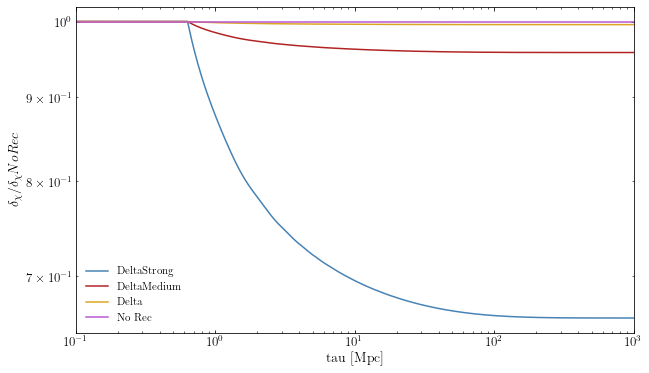

In [31]:
plt.figure(1,figsize=(10,6))
plt.plot(taus,delta_chi_strong(taus)/delta_chi_no_rec(taus), label='DeltaStrong')
plt.plot(taus,delta_chi_Med(taus)/delta_chi_no_rec(taus), label='DeltaMedium')
plt.plot(taus,delta_chi(taus)/delta_chi_no_rec(taus), label='Delta')
plt.plot(taus,delta_chi_no_rec(taus)/delta_chi_no_rec(taus), label='No Rec')
# plt.plot(taus,delta_chi_dot_strong(taus)/delta_chi_dot(taus))
# plt.plot(taus,delta_chi_strong(taus)/delta_chi(taus))

plt.xlabel('tau [Mpc]')
plt.ylabel('$\delta_\chi / \delta_\chi No Rec$')

plt.legend()

plt.xlim(1e-1,1e3)

plt.yscale('log')
plt.xscale('log')

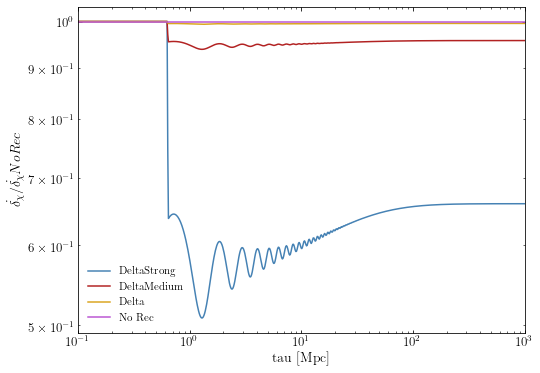

In [30]:
plt.plot(taus,delta_chi_dot_strong(taus)/delta_chi_dot_no_rec(taus), label='DeltaStrong')
plt.plot(taus,delta_chi_dot_Med(taus)/delta_chi_dot_no_rec(taus), label='DeltaMedium')
plt.plot(taus,delta_chi_dot(taus)/delta_chi_dot_no_rec(taus), label='Delta')
plt.plot(taus,delta_chi_dot_no_rec(taus)/delta_chi_dot_no_rec(taus), label='No Rec')
plt.xlim(1e-1,1e3)

plt.xlabel('tau [Mpc]')
plt.ylabel('$\dot{\delta_\chi} / \dot{\delta_\chi} No Rec$')

plt.legend()

plt.yscale('log')
plt.xscale('log')

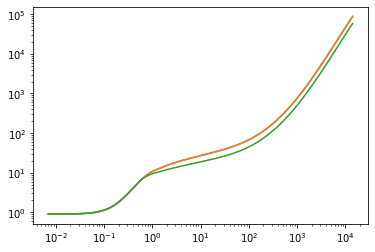

In [196]:
plt.plot(idrNoRec.get_perturbations()['scalar'][0]['tau [Mpc]'],abs(idrNoRec.get_perturbations()['scalar'][0]['delta_idm_dr']))
plt.plot(idrDelta.get_perturbations()['scalar'][0]['tau [Mpc]'],abs(idrDelta.get_perturbations()['scalar'][0]['delta_idm_dr']))
plt.plot(idrDeltaStrong.get_perturbations()['scalar'][0]['tau [Mpc]'],abs(idrDeltaStrong.get_perturbations()['scalar'][0]['delta_idm_dr']))

plt.yscale('log')
plt.xscale('log')

## Hubble 

In [258]:
Hinterp = getH(idrNoRec)

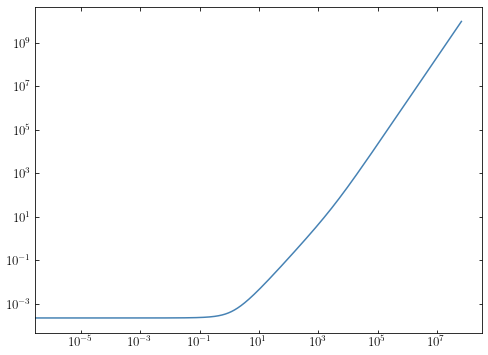

In [262]:
plt.plot(zs,Hinterp(zs))
plt.xscale('log')
plt.yscale('log')

In [264]:
pickle.dump(Hinterp, open("interps/H_interp.p", "wb"))

## Recoupling 1st order

In [61]:
idrThetaset = {
    # Dark matter/radiation parameters
    'f_idm_dr': f_idm_dr, #Amount of dm that is interacting
#     'xi_idr': 0.01, 
    'xi_idr': 0.3, 
    'stat_f_idr': 0.875, #fermionic
    'nindex_idm_dr': 4.0, 
    'm_idm': 1.0e3,
    # Scattering rate parameters
    'a_idm_dr': 1.0e0,
#     'a_idm_dr': 1.0e-2,
    'rec_case': 2, #1 = power, 2 = Theta, 3 = no recoupling
#     'C_rec':0.88e-1,
    'A_rec':2e2,
    'T_rec':2.0e6,
}

In [62]:
#      'A_rec':1000,
idrTheta200 = Class()
idrTheta200.set(commonset)
idrTheta200.set(idrThetaset)

idrTheta200.compute()

idrTheta200dmu_idm_dr, idrTheta200zs, idrTheta200Hspline = getDat(idrTheta200)

In [14]:
#      'A_rec':100,
idrTheta100 = Class()
idrTheta100.set(commonset)
idrTheta100.set(idrThetaset)

idrTheta100.compute()

idrTheta100dmu_idm_dr, idrTheta100zs, idrTheta100Hspline = getDat(idrTheta100)

In [11]:
#      'A_rec':10,
idrTheta10 = Class()
idrTheta10.set(commonset)
idrTheta10.set(idrThetaset)

idrTheta10.compute()

idrTheta10dmu_idm_dr, idrTheta10zs, idrTheta10Hspline = getDat(idrTheta10)

In [ ]:
idrTheta = Class()
idrTheta.set(commonset)
idrTheta.set(idrThetaset)

idrTheta.compute()

idrThetadmu_idm_dr, idrThetazs, idrThetaHspline = getDat(idrTheta)

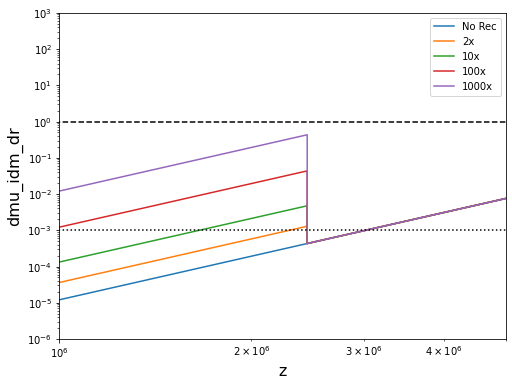

In [35]:
#      'A_rec':2,
plt.figure(1,figsize=(8,6))

plt.plot(idrThetazs,idrNoRecdmu_idm_dr,label='No Rec')
plt.plot(idrThetazs,idrThetadmu_idm_dr,label='2x')
plt.plot(idrTheta10zs,idrTheta10dmu_idm_dr,label='10x')
plt.plot(idrTheta10zs,idrTheta100dmu_idm_dr,label='100x')
plt.plot(idrTheta10zs,idrTheta1000dmu_idm_dr,label='1000x')
    
plt.plot([1e-3,1e10], [1,1], 'k--')

plt.plot([1e-3,1e10], [1e-3,1e-3], 'k:')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=16)
plt.ylabel('dmu_idm_dr', fontsize=16)

plt.xlim(1e6,5e6)
plt.ylim(1e-6,1e3)

plt.legend()
plt.savefig('Figures/dmu.png')
plt.show()

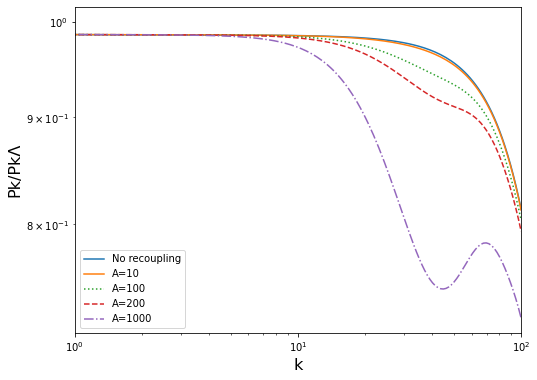

In [33]:
plt.figure(1,figsize=(8,6))

plt.plot(kk,getPkRatio(idrNoRec,LambdaCDM),label='No recoupling')
plt.plot(kk,getPkRatio(idrTheta10,LambdaCDM),label='A=10')
plt.plot(kk,getPkRatio(idrTheta100,LambdaCDM),':',label='A=100')
plt.plot(kk,getPkRatio(idrTheta200,LambdaCDM),'--',label='A=200')
plt.plot(kk,getPkRatio(idrTheta1000,LambdaCDM),'-.',label='A=1000')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1.0,pk_max)
# plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/PkΛ',fontsize=16)
plt.legend()
plt.savefig('Figures/Pk.png')
# plt.show()

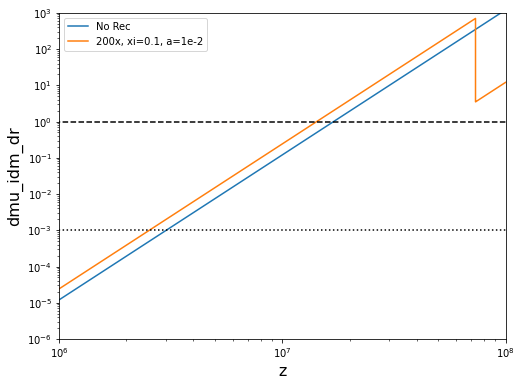

In [63]:
plt.figure(1,figsize=(8,6))

plt.plot(idrThetazs,idrNoRecdmu_idm_dr,label='No Rec')
plt.plot(idrThetazs,idrTheta200dmu_idm_dr,label='200x, xi=0.1, a=1e-2')
    
plt.plot([1e-3,1e10], [1,1], 'k--')

plt.plot([1e-3,1e10], [1e-3,1e-3], 'k:')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=16)
plt.ylabel('dmu_idm_dr', fontsize=16)

plt.xlim(1e6,1e8)
plt.ylim(1e-6,1e3)

plt.legend()
plt.show()

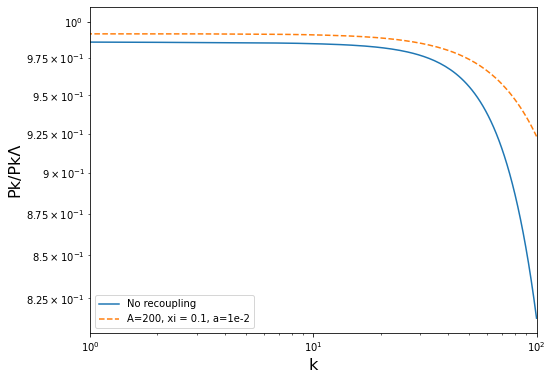

In [64]:
plt.figure(1,figsize=(8,6))

plt.plot(kk,getPkRatio(idrNoRec,LambdaCDM),label='No recoupling')

plt.plot(kk,getPkRatio(idrTheta200,LambdaCDM),'--',label='A=200, xi = 0.1, a=1e-2')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1.0,pk_max)
# plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/PkΛ',fontsize=16)
plt.legend()
plt.show()

## xi and a

In [71]:
idrxiset = {
    # Dark matter/radiation parameters
    'f_idm_dr': f_idm_dr, #Amount of dm that is interacting
#     'xi_idr': 0.1, 
    'stat_f_idr': 0.875, #fermionic
    'nindex_idm_dr': 4.0, 
    'm_idm': 1.0e3,
    # Scattering rate parameters
    'a_idm_dr': 1.0e0,
    'rec_case': 3, #1 = power, 2 = Theta, 3 = no recoupling
#     'C_rec':0.88e-1,
#     'A_rec':2e2,
#     'T_rec':2.0e6,
}

In [72]:
xi01 = Class()
xi01.set(commonset)
xi01.set(idrxiset)
xi01.set({'xi_idr':0.1})
xi01.compute()

In [73]:
xi05 = Class()
xi05.set(commonset)
xi05.set(idrxiset)
xi05.set({'xi_idr':0.5})
xi05.compute()

In [76]:
xi01dmu_idm_dr, xi01zs, xi01Hspline = getDat(xi01)
xi05dmu_idm_dr, xi05zs, xi05Hspline = getDat(xi05)

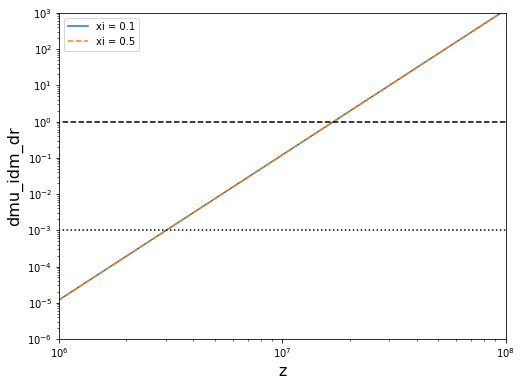

In [87]:
plt.figure(1,figsize=(8,6))

plt.plot(xi01zs,xi01dmu_idm_dr,label='xi = 0.1')
plt.plot(xi01zs,xi01dmu_idm_dr,'--',label='xi = 0.5')
    
plt.plot([1e-3,1e10], [1,1], 'k--')

plt.plot([1e-3,1e10], [1e-3,1e-3], 'k:')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=16)
plt.ylabel('dmu_idm_dr', fontsize=16)

plt.xlim(1e6,1e8)
plt.ylim(1e-6,1e3)

plt.legend()
plt.show()

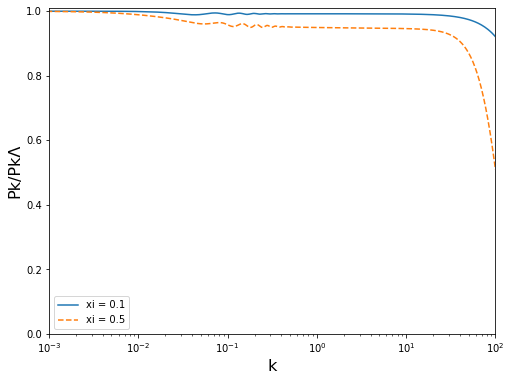

In [88]:
plt.figure(1,figsize=(8,6))

plt.plot(kk,getPkRatio(xi01,LambdaCDM),label='xi = 0.1')

plt.plot(kk,getPkRatio(xi05,LambdaCDM),'--',label='xi = 0.5')

plt.xscale('log')
# plt.yscale('log')
plt.xlim(1.0e-3,pk_max)
plt.ylim(0,1.01)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/PkΛ',fontsize=16)
plt.legend()
plt.show()

## Recoupling Power

In [12]:
idrPowerset = {
    # Dark matter/radiation parameters
    'f_idm_dr': f_idm_dr, #Amount of dm that is interacting
    'xi_idr': 0.3, 
    'stat_f_idr': 0.875, #fermionic
    'nindex_idm_dr': 4.0, 
    'm_idm': 1.0e3,
    # Scattering rate parameters
    'a_idm_dr': 1.0e0,
    'rec_case': 1, #1 = power, 2 = Theta, 3 = no recoupling
#     'C_rec':0.88e-1,
    'C_rec':0.9e-1,
    'T_rec':2.0e6,
    'nu_rec':-0.5
}

In [13]:
idrPower = Class()
idrPower.set(commonset)
idrPower.set(idrPowerset)

idrPower.compute()

idrPowerdmu_idm_dr, idrPowerzs, idrPowerHspline = getDat(idrPower)

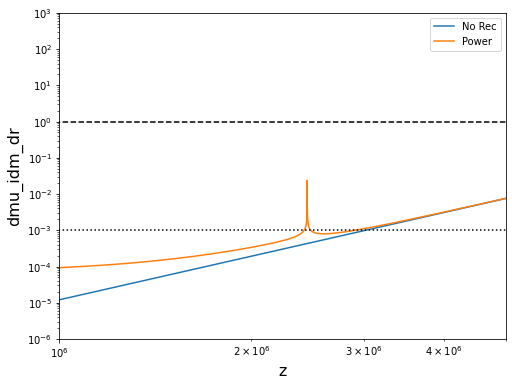

In [10]:
#     'C_rec':0.88e-1,
plt.figure(1,figsize=(8,6))

plt.plot(idrPowerzs,idrNoRecdmu_idm_dr,label='No Rec')
plt.plot(idrPowerzs,idrPowerdmu_idm_dr,label='Power')
    
plt.plot([1e-3,1e10], [1,1], 'k--')

plt.plot([1e-3,1e10], [1e-3,1e-3], 'k:')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=16)
plt.ylabel('dmu_idm_dr', fontsize=16)

plt.xlim(1e6,5e6)
plt.ylim(1e-6,1e3)

plt.legend()
plt.show()

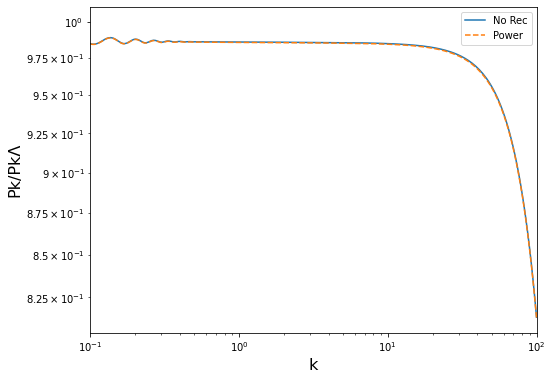

In [11]:
#     'C_rec':0.88e-1,
plt.figure(1,figsize=(8,6))

plt.plot(kk,getPkRatio(idrNoRec,LambdaCDM),label='No Rec')
plt.plot(kk,getPkRatio(idrPower,LambdaCDM),'--',label='Power')
plt.xscale('log')
plt.yscale('log')
plt.xlim(.1,pk_max)
# plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/PkΛ',fontsize=16)
plt.legend()
plt.show()


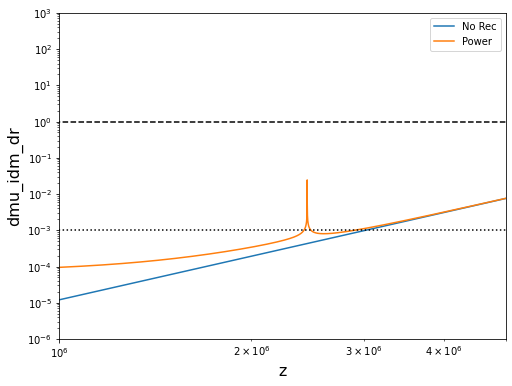

In [14]:
#     'C_rec':0.9e-1,
plt.figure(1,figsize=(8,6))

plt.plot(idrPowerzs,idrNoRecdmu_idm_dr,label='No Rec')
plt.plot(idrPowerzs,idrPowerdmu_idm_dr,label='Power')
    
plt.plot([1e-3,1e10], [1,1], 'k--')

plt.plot([1e-3,1e10], [1e-3,1e-3], 'k:')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z', fontsize=16)
plt.ylabel('dmu_idm_dr', fontsize=16)

plt.xlim(1e6,5e6)
plt.ylim(1e-6,1e3)

plt.legend()
plt.show()

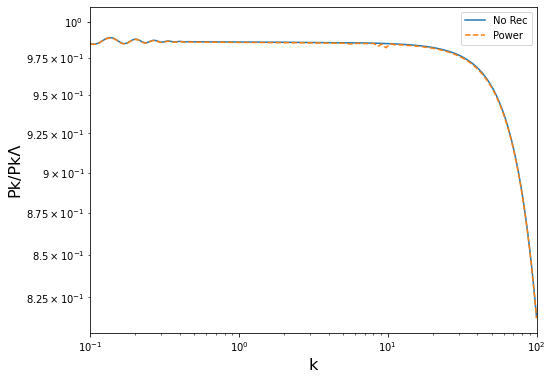

In [15]:
#     'C_rec':0.9e-1,
plt.figure(1,figsize=(8,6))

plt.plot(kk,getPkRatio(idrNoRec,LambdaCDM),label='No Rec')
plt.plot(kk,getPkRatio(idrPower,LambdaCDM),'--',label='Power')
plt.xscale('log')
plt.yscale('log')
plt.xlim(.1,pk_max)
# plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/PkΛ',fontsize=16)
plt.legend()
plt.show()

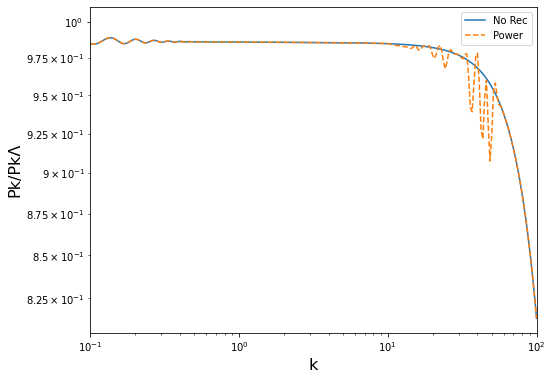

In [17]:
#     'C_rec':1.e-1,
plt.figure(1,figsize=(8,6))

plt.plot(kk,getPkRatio(idrNoRec,LambdaCDM),label='No Rec')
plt.plot(kk,getPkRatio(idrPower,LambdaCDM),'--',label='Power')
plt.xscale('log')
plt.yscale('log')
plt.xlim(.1,pk_max)
# plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/PkΛ',fontsize=16)
plt.legend()
plt.show()


## Old

In [29]:
#gamma/a
tsrArr = [idrNoRecdmu_idm_dr[i]* (1+idrNoReczs[i]) for i in range(len(idrNoReczs))]

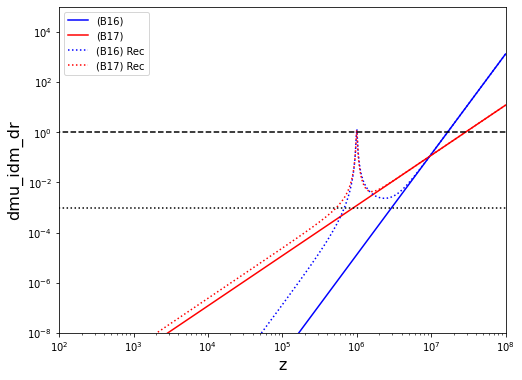

In [62]:
plt.figure(1,figsize=(8,6))

plt.plot(b16Coszs,b16Cosdmu_idm_dr,'b',label='(B16)')
plt.plot(b17Coszs,b17Cosdmu_idm_dr,'r',label='(B17)')
plt.plot(b16RecCoszs,b16RecCosdmu_idm_dr,'b:',label='(B16) Rec')
plt.plot(b17RecCoszs,b17RecCosdmu_idm_dr,'r:',label='(B17) Rec')
    
plt.plot([1e-3,1e10], [1,1], 'k--')

plt.plot([1e-3,1e10], [1e-3,1e-3], 'k:')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2,1e8)
plt.ylim(1e-8, 1e5)


plt.xlabel('z', fontsize=16)
plt.ylabel('dmu_idm_dr', fontsize=16)
plt.legend()
# plt.savefig('../figures/dmuSD.pdf')
plt.show()

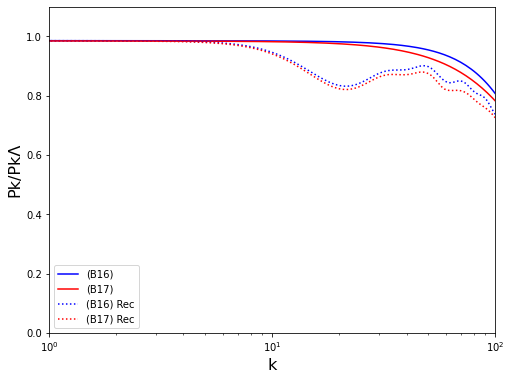

In [63]:
plt.figure(1,figsize=(8,6))
plt.plot(kk,getPkRatio(b16Cos,LambdaCDM),'b',label='(B16)')
plt.plot(kk,getPkRatio(b17Cos,LambdaCDM),'r',label='(B17)')
plt.plot(kk,getPkRatio(b16RecCos,LambdaCDM),'b:',label='(B16) Rec')
plt.plot(kk,getPkRatio(b17RecCos,LambdaCDM),'r:',label='(B17) Rec')
plt.xscale('log')
plt.yscale('linear')
plt.xlim(1,pk_max)
plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pk/PkΛ',fontsize=16)
plt.legend()
# plt.savefig('../figures/PkSD.pdf')
plt.show()

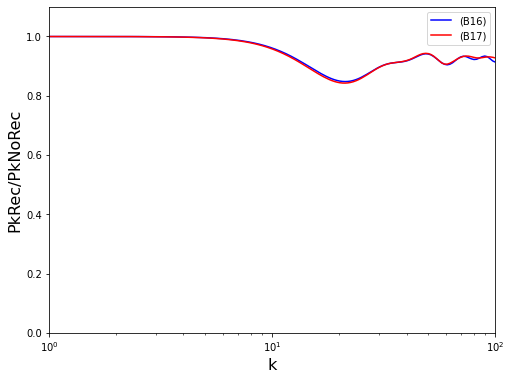

In [ ]:
plt.figure(1,figsize=(8,6))
plt.plot(kk,getPkRatio(b16RecCos,b16Cos),'b',label='(B16)')
plt.plot(kk,getPkRatio(b17RecCos,b17Cos),'r',label='(B17)')
plt.xscale('log')
plt.yscale('linear')
plt.xlim(1,pk_max)
plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('PkRec/PkNoRec',fontsize=16)
plt.legend()
# plt.savefig('../figures/PkSD.pdf')
plt.show()

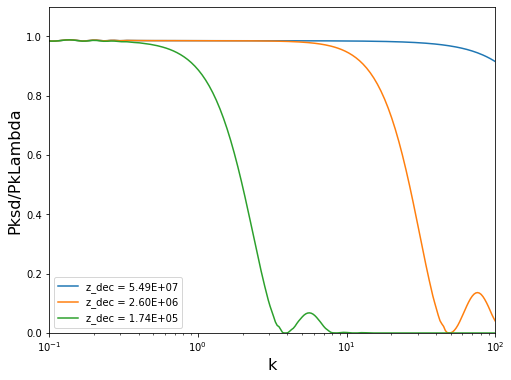

In [17]:
plt.figure(1,figsize=(8,6))
for i,sdCos in enumerate(sdCosArr):
    plt.plot(kk,getPkRatio(sdCos,LambdaCDM),label='z_dec = {:.2E}'.format(decouplingZ(0,0,0,a_arr[i])))
plt.xscale('log')
plt.yscale('linear')
plt.xlim(.1,pk_max)
plt.ylim(0,1.1)
plt.xlabel('k',fontsize=16)
plt.ylabel('Pksd/PkLambda',fontsize=16)
plt.legend()
# plt.savefig('../figures/PkSD.pdf')
plt.show()